In [8]:
import matplotlib.pyplot as plt
import import_ipynb
from Model import GoogLeNetV1
from Model_add_bn import InceptionV1
import tensorflow as tf
import json
import os
import time
import glob
import random

In [2]:
im_height = 224
im_width = 224

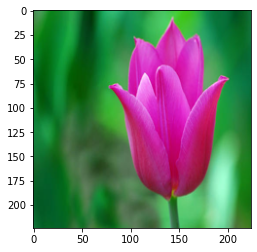

In [6]:
from PIL import Image
img = Image.open("../tulip.jpg")
img = img.resize((im_width,im_height))
plt.imshow(img)

In [10]:
import numpy as np
img = ((np.array(img)/255.) - 0.5)/0.5

In [11]:
img = (np.expand_dims(img,0))

In [12]:
try:
    json_file = open('./class_indices.json', 'r')
    class_indict = json.load(json_file)
except Exception as e:
    print(e)

In [14]:
model = InceptionV1(class_num=5, aux_logits=False)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1/conv (Conv2D)          (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/bn (BatchNormalization (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 64)      0         
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 56, 56, 64)        0         
_________________________________________________________________
conv2/conv (Conv2D)          (None, 56, 56, 64)        4096      
_________________________________________________________________
conv2/bn (BatchNormalization (None, 56, 56, 64)        256   

In [15]:
model.load_weights('./save_weights/myGoogLeNet.ckpt')
# model.load_weights("./save_weights/myGoogLenet.h5", by_name=True)  # h5 format

In [16]:
result = model.predict(img)
result

array([[5.2482949e-04, 1.1538281e-03, 9.7786891e-04, 9.9733210e-01,
        1.1434592e-05]], dtype=float32)

In [17]:
predict_class = np.argmax(result)

In [18]:
print(class_indict[str(predict_class)])

tulips
